In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
tickers = ['RDDT', 'CRCL', 'NVDA', 'SMR', 'MU', 'MRVL', 'MSFT', 'ASML', 'AEM', 'AMD', 'VERU', 'AI', 'GOOGL', 'INGM', 'PLUG', 'IONQ', 'CHYM', 'RGTI', 'ARBE']

data = yf.download(tickers, period='1y', auto_adjust=False)['Close'].round(4)
data

[*********************100%***********************]  19 of 19 completed


Ticker,AEM,AI,AMD,ARBE,ASML,CHYM,CRCL,GOOGL,INGM,IONQ,MRVL,MSFT,MU,NVDA,PLUG,RDDT,RGTI,SMR,VERU
Date,,,,,,,,,,,,,,,,,,,
2024-08-01,76.09,25.8200,132.54,2.0900,883.71,NaN,NaN,170.76,NaN,7.5200,63.06,417.11,101.51,109.2100,2.320,59.3800,0.9480,9.1100,0.8900
2024-08-02,75.12,24.4300,132.50,2.0800,809.35,NaN,NaN,166.66,NaN,7.0800,59.25,408.49,92.70,107.2700,2.160,57.5800,0.8970,8.5900,0.8400
2024-08-05,73.17,23.9000,134.82,2.1500,820.35,NaN,NaN,159.25,NaN,6.5700,57.67,395.15,90.42,100.4500,2.210,56.8100,0.7960,8.7600,0.8300
2024-08-06,75.01,23.9000,130.18,2.0600,843.01,NaN,NaN,158.29,NaN,7.2100,58.22,399.61,89.00,104.2500,2.150,54.3600,0.8460,8.1300,0.8100
2024-08-07,72.24,23.4000,128.67,2.0000,836.35,NaN,NaN,158.94,NaN,6.8000,56.15,398.43,86.80,98.9100,2.080,50.6900,0.7780,8.6800,0.7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-28,123.74,25.7900,173.66,1.5100,729.99,33.430,185.360,192.58,21.00,42.3400,75.91,512.50,111.25,176.7500,1.770,151.6000,15.5700,50.9900,0.5300
2025-07-29,126.30,24.4800,177.44,1.3800,718.49,32.625,181.640,195.75,20.80,40.5300,76.34,512.57,111.96,175.5100,1.590,144.8500,14.4700,48.9700,0.4900
2025-07-30,123.37,24.2200,179.51,1.3800,721.45,33.820,190.500,196.53,20.43,39.8800,81.74,513.24,114.74,179.2700,1.550,149.3300,14.1700,50.5100,0.4900


In [3]:
# --- 1. Calculate performance metrics ---
daily_returns = data.pct_change()
cumulative_returns = (1 + daily_returns).cumprod()
volatility = daily_returns.std() * np.sqrt(252)
total_return = cumulative_returns.iloc[-1] - 1

performance = pd.DataFrame({
    'Total Return': total_return,
    'Volatility': volatility
}).sort_values(by='Total Return')

print("Performance summary:")
print(performance)

Performance summary:
        Total Return  Volatility
Ticker                          
VERU       -0.450112    0.967122
PLUG       -0.385776    1.095414
ARBE       -0.360526    1.047727
ASML       -0.217255    0.445002
INGM       -0.213008    0.423819
CHYM       -0.121800    0.704656
AI         -0.115043    0.652355
MU          0.046695    0.616533
GOOGL       0.106055    0.314332
MRVL        0.203933    0.711307
MSFT        0.256935    0.251074
AMD         0.309416    0.520981
NVDA        0.612568    0.538360
AEM         0.640294    0.345354
RDDT        2.268584    0.890569
SMR         3.910263    1.180280
IONQ        4.170545    1.271178
CRCL        4.681452    4.538594
RGTI       14.071308    1.845051


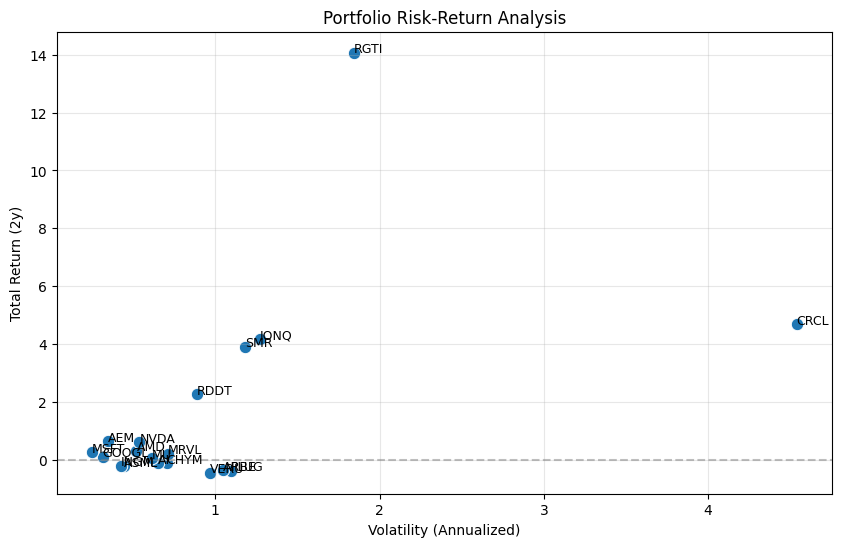

In [4]:
# --- 2. Visualize Risk vs Return ---
plt.figure(figsize=(10,6))
sns.scatterplot(x=performance['Volatility'], y=performance['Total Return'], s=80)

for ticker in performance.index:
    plt.text(performance.loc[ticker,'Volatility'], 
             performance.loc[ticker,'Total Return'], 
             ticker, fontsize=9)

plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Volatility (Annualized)')
plt.ylabel('Total Return (2y)')
plt.title('Portfolio Risk-Return Analysis')
plt.grid(True, alpha=0.3)
plt.show()

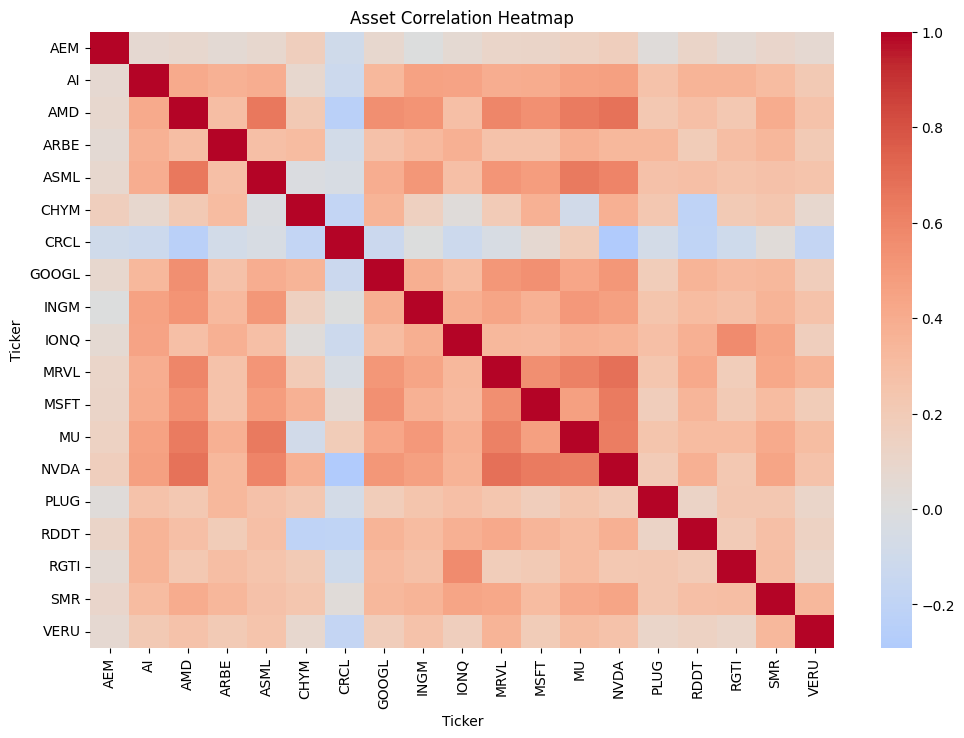

In [5]:

# --- 3. Correlation with portfolio ---
corr_matrix = daily_returns.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Asset Correlation Heatmap")
plt.show()




In [6]:
# --- 4. Identify Sell Candidates ---
# Simple rule: Negative return OR low return with high volatility
sell_candidates = performance[(performance['Total Return'] < 0) | 
                              (performance['Volatility'] > performance['Volatility'].median())]

print("Suggested assets to sell first:")
print(sell_candidates)

Suggested assets to sell first:
        Total Return  Volatility
Ticker                          
VERU       -0.450112    0.967122
PLUG       -0.385776    1.095414
ARBE       -0.360526    1.047727
ASML       -0.217255    0.445002
INGM       -0.213008    0.423819
CHYM       -0.121800    0.704656
AI         -0.115043    0.652355
MRVL        0.203933    0.711307
RDDT        2.268584    0.890569
SMR         3.910263    1.180280
IONQ        4.170545    1.271178
CRCL        4.681452    4.538594
RGTI       14.071308    1.845051


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['RDDT','NVDA', 'SMR', 'MU', 'MRVL', 'MSFT', 'ASML', 'AEM', 'AMD', 'VERU', 'AI', 'GOOGL', 'INGM', 'PLUG', 'IONQ', 'CHYM', 'RGTI', 'ARBE']

# Download 1 year of daily data
data = yf.download(tickers, period="1y", auto_adjust=False)['Close'].round(2)
data

[*********************100%***********************]  18 of 18 completed


Ticker,AEM,AI,AMD,ARBE,ASML,CHYM,GOOGL,INGM,IONQ,MRVL,MSFT,MU,NVDA,PLUG,RDDT,RGTI,SMR,VERU
Date,,,,,,,,,,,,,,,,,,
2024-08-01,76.09,25.82,132.54,2.09,883.71,NaN,170.76,NaN,7.52,63.06,417.11,101.51,109.21,2.32,59.38,0.95,9.11,0.89
2024-08-02,75.12,24.43,132.50,2.08,809.35,NaN,166.66,NaN,7.08,59.25,408.49,92.70,107.27,2.16,57.58,0.90,8.59,0.84
2024-08-05,73.17,23.90,134.82,2.15,820.35,NaN,159.25,NaN,6.57,57.67,395.15,90.42,100.45,2.21,56.81,0.80,8.76,0.83
2024-08-06,75.01,23.90,130.18,2.06,843.01,NaN,158.29,NaN,7.21,58.22,399.61,89.00,104.25,2.15,54.36,0.85,8.13,0.81
2024-08-07,72.24,23.40,128.67,2.00,836.35,NaN,158.94,NaN,6.80,56.15,398.43,86.80,98.91,2.08,50.69,0.78,8.68,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-28,123.74,25.79,173.66,1.51,729.99,33.43,192.58,21.00,42.34,75.91,512.50,111.25,176.75,1.77,151.60,15.57,50.99,0.53
2025-07-29,126.30,24.48,177.44,1.38,718.49,32.62,195.75,20.80,40.53,76.34,512.57,111.96,175.51,1.59,144.85,14.47,48.97,0.49
2025-07-30,123.37,24.22,179.51,1.38,721.45,33.82,196.53,20.43,39.88,81.74,513.24,114.74,179.27,1.55,149.33,14.17,50.51,0.49


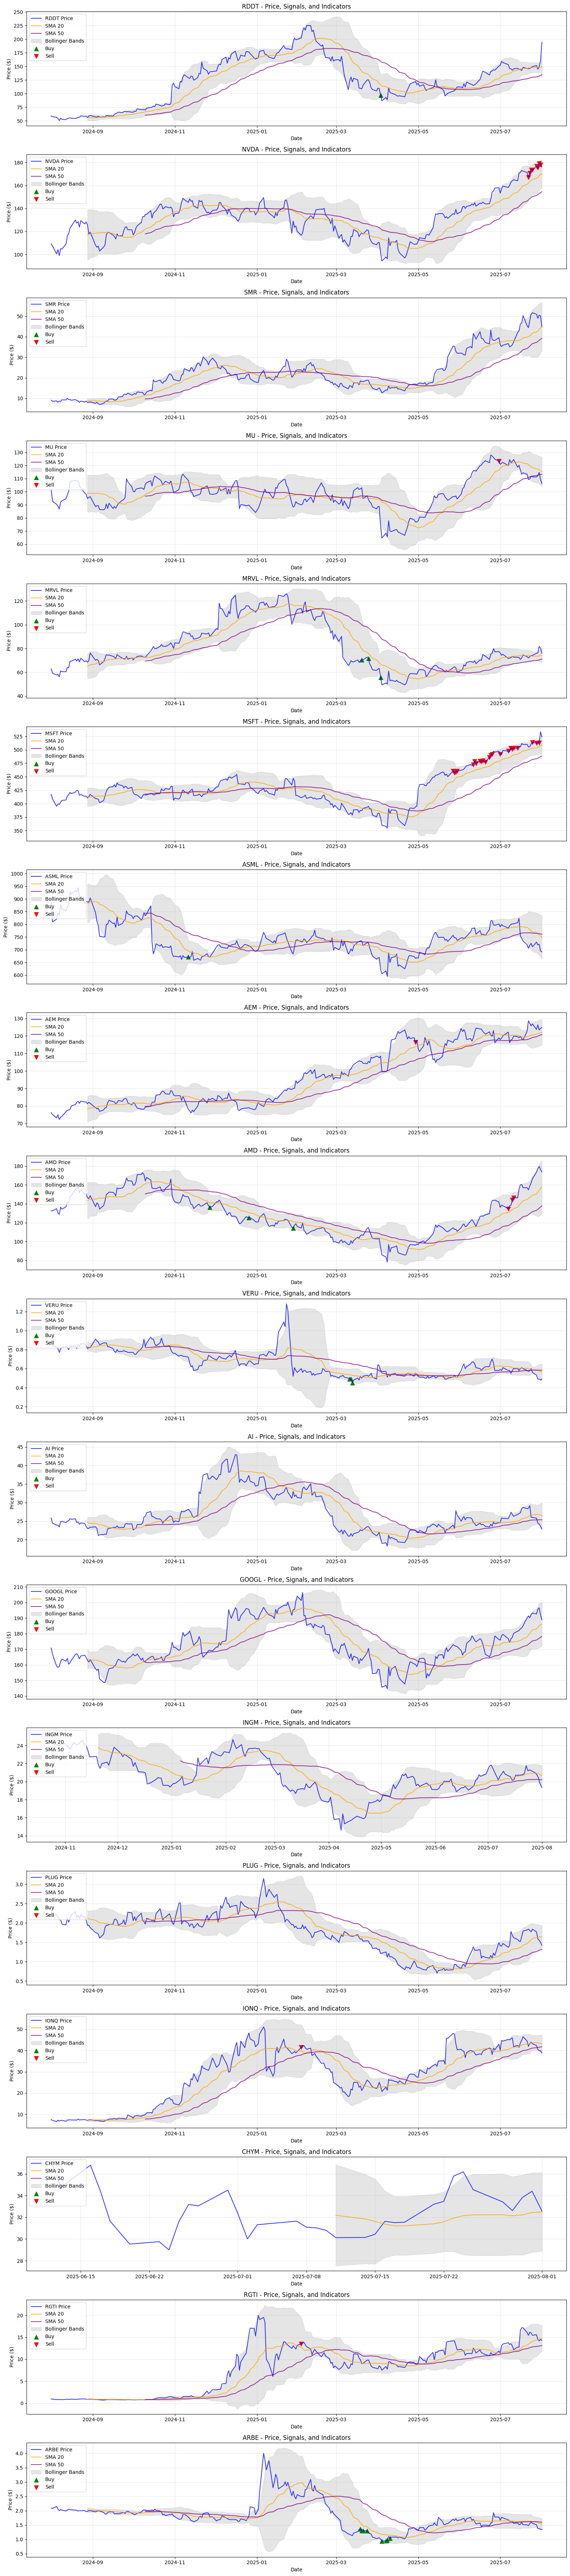

In [8]:

def compute_signals_and_indicators(price_series):
    # --- RSI (14-day) ---
    delta = price_series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    roll_up = gain.rolling(14).mean()
    roll_down = loss.rolling(14).mean()
    rs = roll_up / roll_down
    rsi = 100 - (100 / (1 + rs))
    
    # --- MACD ---
    ema12 = price_series.ewm(span=12, adjust=False).mean()
    ema26 = price_series.ewm(span=26, adjust=False).mean()
    macd = ema12 - ema26
    signal = macd.ewm(span=9, adjust=False).mean()
    
    # --- Bollinger Bands (20-day SMA ± 2 std) ---
    sma20 = price_series.rolling(20).mean()
    std20 = price_series.rolling(20).std()
    upper_band = sma20 + (2 * std20)
    lower_band = sma20 - (2 * std20)
    
    # --- Moving Averages ---
    sma50 = price_series.rolling(50).mean()
    
    # --- Buy/Sell Signals ---
    buy_signals = (rsi < 30) & (macd > signal)
    sell_signals = (rsi > 70) & (macd < signal)
    
    return sma20, sma50, upper_band, lower_band, buy_signals, sell_signals

plt.figure(figsize=(16, 4*len(tickers)))

for i, ticker in enumerate(tickers, 1):
    series = data[ticker].dropna()
    sma20, sma50, upper_band, lower_band, buy_signals, sell_signals = compute_signals_and_indicators(series)
    
    plt.subplot(len(tickers), 1, i)
    plt.plot(series.index, series, color='blue', label=f'{ticker} Price', alpha=0.8)
    
    # Moving averages
    plt.plot(series.index, sma20, color='orange', label='SMA 20', alpha=0.8)
    plt.plot(series.index, sma50, color='purple', label='SMA 50', alpha=0.8)
    
    # Bollinger Bands
    plt.fill_between(series.index, lower_band, upper_band, color='gray', alpha=0.2, label='Bollinger Bands')
    
    # Buy / Sell signals
    plt.scatter(series.index[buy_signals], series[buy_signals], 
                marker='^', color='green', s=70, label='Buy')
    plt.scatter(series.index[sell_signals], series[sell_signals], 
                marker='v', color='red', s=70, label='Sell')
    
    plt.title(f"{ticker} - Price, Signals, and Indicators")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.grid(alpha=0.3)
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
